In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
!git clone -q https://github.com/xelaphon/solar-cup.git

fatal: destination path 'solar-cup' already exists and is not an empty directory.


In [ ]:
load_data = pd.read_csv("solar-cup/CSUN_15_min_Load_Data_V2_kW.csv", low_memory = False)

In [ ]:
measurements = 35040
date_time = np.empty((measurements, 2), dtype="<U10")
for k in range(measurements):
  entry = load_data['Timestamp'][k].split(' ')
  date_time[k,0] = str(entry[0])
  date_time[k,1] = entry[1].split(':')[0] + ':' + entry[1].split(':')[1]
count_days = np.where(date_time[:,1] == '00:00')
days = len(count_days[0])
times = count_days[0][1] - count_days[0][0]
measured_buildings = len(load_data.columns) - 1
load_data_clean = np.zeros((measured_buildings, days, times)) #buildings, number of days, number of data points in a day
for i in range(measured_buildings):
  year_position = 0
  current_building = np.array(load_data[load_data.columns[i+1]])
  for j in range(days):
    for k in range(times):
      value = current_building[year_position]
      if(type(value) == str and ('!' not in value)):
        load_data_clean[i][j][k] = float(value.split('k')[0])
      elif((type(value) == str and ('!' in value)) or math.isnan(value)):
        load_data_clean[i][j][k] = 0
      else:
        load_data_clean[i][j][k] = value
      year_position += 1

KeyError: 'Timestamp'

In [ ]:
def average_day(i):
  x_array = np.array([])
  y_array = np.array([])
  print(load_data.columns[i+1])
  for k in range(times):
    sum = 0
    count = 0
    for j in range(days):
      if load_data_clean[i][j][k] != -1:
        sum += load_data_clean[i][j][k]
        count += 1
    if count != 0:
      x_array = np.append(x_array, date_time[k,1])
      y_array = np.append(y_array, sum/count)
  print("Average Max:", np.max(y_array))
  plt.figure(figsize=(15, 10))
  plt.plot(x_array, y_array)
  plt.xticks(np.arange(0, 95, 4), [date_time[0,1], date_time[4,1], date_time[8,1], date_time[12,1], date_time[16,1], date_time[20,1], date_time[24,1],
                                   date_time[28,1], date_time[32,1], date_time[36,1], date_time[40,1], date_time[44,1], date_time[48,1], date_time[52,1],
                                   date_time[56,1], date_time[60,1], date_time[64,1], date_time[68,1], date_time[72,1], date_time[76,1], date_time[80,1],
                                   date_time[84,1], date_time[88,1], date_time[92,1]])

In [ ]:
load_data_clean[0].sum()

646084.1

In [ ]:
load_data.head()

,Timestamp,ADC Total Electric Meter Usage,AR Total Electric Meter Usage (C),BB Total Electric Meter Usage (C),BH Total Electric Meter Usage (Delta - C),BK CLEANED FINAL,BO Total Electric Meter BACnet Demand,BP Total Electric Meter Usage,CR Total Electric Meter Usage (C),CS Total Electric Meter Usage (C),...,PS: G3 Total Electric Meter Usage (C),RE Total Electric Meter BACnet Usage (C),SC Total Electric Meter Usage (C),SH Total Electric Meter Merged Usage (C),SQ Total Electric Meter Usage (C),SRC Total Electric Meter Usage (C),ST Total Electric Meter BACnet Usage (C),UN Total Electric Meter Merged Usage (C),USU Total Electric Meter (M) Usage post-June 2017,VPAC Total Electric Meter Siemens Usage
0,2022-01-01 00:00:00 PST,11.5,2.4kWh,11.1kWh,18.0kWh,60.553763,0.0kW,0.4kWh,NaN,29.6kWh,...,6.5kWh,39.5kWh,14.5kWh,16.5kWh,38.0kWh,70.5kWh,3.7kWh,10.0kWh,332.7kWh,32.0kWh
1,2022-01-01 00:15:00 PST,11.8,2.4kWh,11.6kWh,20.0kWh,43.500000,0.0kW,0.3kWh,NaN,26.2kWh,...,6.5kWh,41.0kWh,NaN,17.0kWh,39.0kWh,NaN,3.7kWh,10.0kWh,NaN,30.0kWh
2,2022-01-01 00:30:00 PST,11.8,2.3kWh,12.2kWh,20.0kWh,45.000000,0.0kW,0.4kWh,NaN,29.6kWh,...,6.4kWh,38.5kWh,NaN,17.5kWh,40.0kWh,NaN,3.7kWh,10.5kWh,NaN,28.0kWh
3,2022-01-01 00:45:00 PST,11.3,2.3kWh,12.0kWh,20.0kWh,40.500000,0.0kW,0.4kWh,NaN,29.6kWh,...,6.1kWh,39.5kWh,NaN,17.0kWh,39.0kWh,NaN,3.7kWh,10.0kWh,NaN,28.0kWh
4,2022-01-01 01:00:00 PST,12.0,2.4kWh,12.1kWh,20.0kWh,41.500000,0.0kW,0.4kWh,NaN,26.6kWh,...,6.4kWh,40.0kWh,17.0kWh,17.0kWh,39.0kWh,70.9kWh,3.7kWh,10.5kWh,332.7kWh,28.0kWh


ADC Total Electric Meter Usage
Average Max: 22.08438356164389


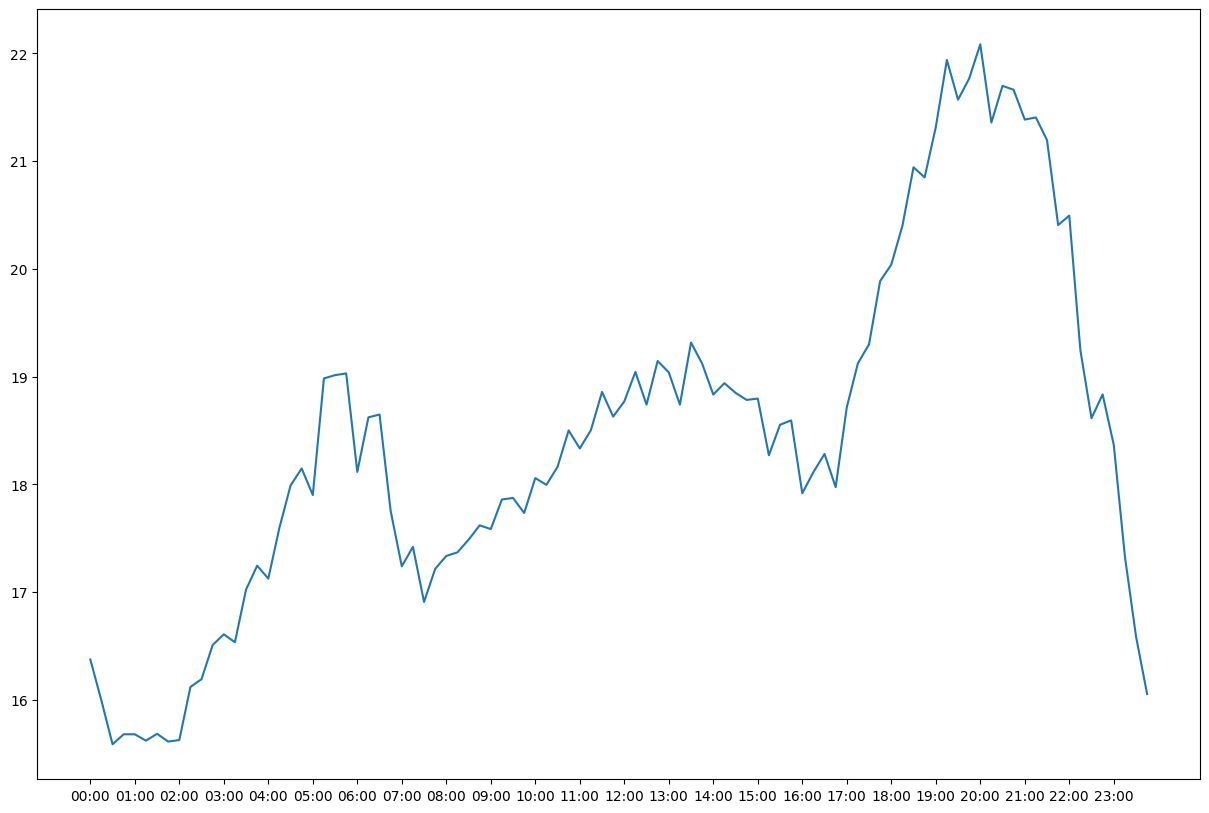

In [ ]:
average_day(0)

In [ ]:
def average_day_dev(i):
  x_array = np.array([])
  y_array = np.array([])
  print(load_data.columns[i+1])
  for k in range(times):
    sum = 0
    count = 0
    for j in range(days):
      sum += load_data_clean[i][j][k]
      count += 1
    if count != 0:
      x_array = np.append(x_array, date_time[k,1])
      y_array = np.append(y_array, sum/count)
  plt.figure(figsize=(15, 10))
  plt.plot(x_array, y_array)
  plt.xticks(np.arange(0, 95, 4), [date_time[0,1], date_time[4,1], date_time[8,1], date_time[12,1], date_time[16,1], date_time[20,1], date_time[24,1],
                                   date_time[28,1], date_time[32,1], date_time[36,1], date_time[40,1], date_time[44,1], date_time[48,1], date_time[52,1],
                                   date_time[56,1], date_time[60,1], date_time[64,1], date_time[68,1], date_time[72,1], date_time[76,1], date_time[80,1],
                                   date_time[84,1], date_time[88,1], date_time[92,1]])
  for k in range(times):
    for j in range(days):
      avg = y_array[k]
      if abs((load_data_clean[i][j][k]-avg)/avg) > 0.25:
        plt.plot(x_array[k], load_data_clean[i][j][k], 'ro')
      # if load_data_clean[i][j][k] > 100:
      #   print(load_data_clean[i][j][k])
      #   print(i)
      #   print(j)
      #   print(k)

PL: G3 Total Electric Meter Usage (C)


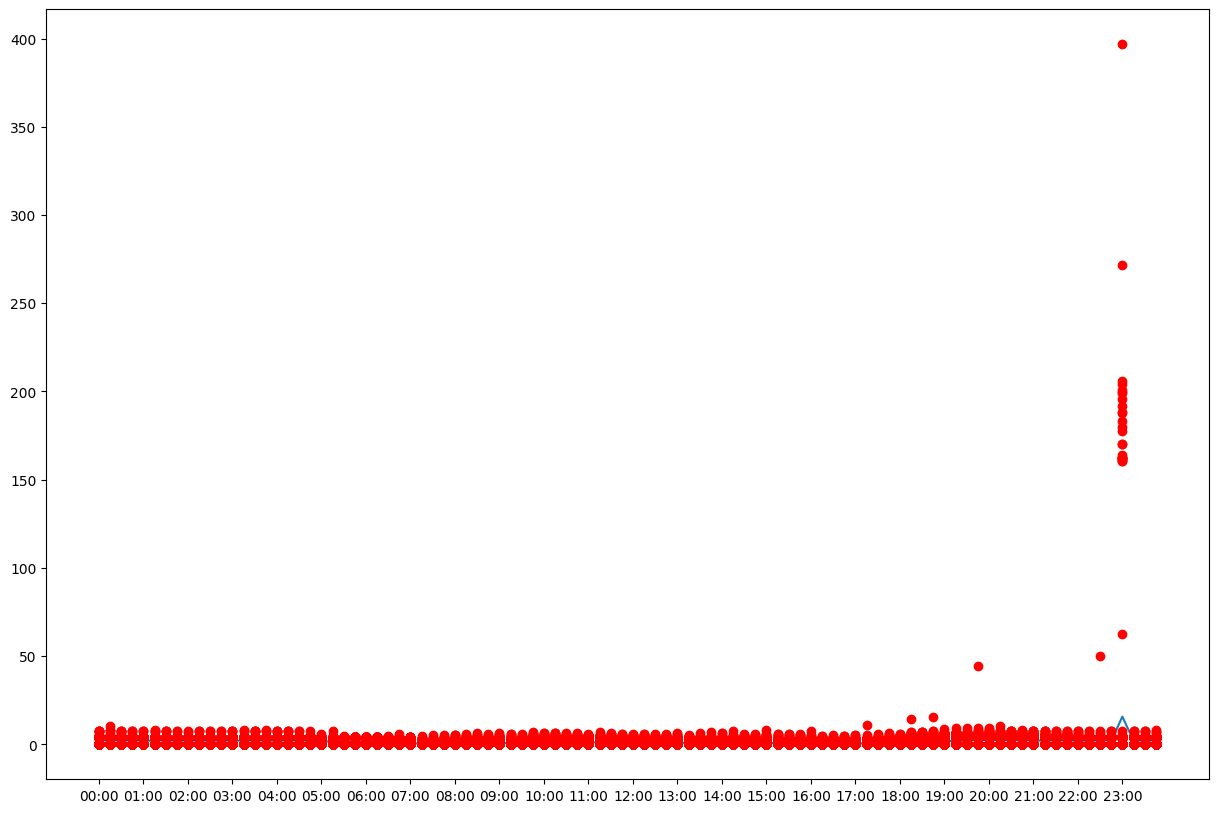

In [ ]:
average_day_dev(27)

In [ ]:
len(load_data.columns)

42

In [ ]:
days

365

In [ ]:
load_data_clean[6][212][83] = 0
load_data_clean[6][201][90] = 0
load_data_clean[7][296][39] = 0
load_data_clean[9][212][83] = 0
load_data_clean[11][309][9] = 0
load_data_clean[12][221][45] = 0
load_data_clean[12][264][49] = 0
load_data_clean[12][200][64] = 0
load_data_clean[12][212][83] = 0
load_data_clean[12][201][90] = 0
load_data_clean[12][220][70] = 0
load_data_clean[12][206][75] = 0
load_data_clean[14][264][49] = 0
load_data_clean[14][220][70] = 0
load_data_clean[14][221][71] = 0
load_data_clean[14][212][83] = 0
load_data_clean[14][201][90] = 0
load_data_clean[15][309][9] = 0
load_data_clean[16][264][48] = 0
load_data_clean[16][200][63] = 0
load_data_clean[16][220][70] = 0
load_data_clean[16][221][71] = 0
load_data_clean[16][212][83] = 0
load_data_clean[16][201][90] = 0
load_data_clean[19][200][64] = 0
load_data_clean[19][212][83] = 0
load_data_clean[19][201][90] = 0
load_data_clean[20][212][83] = 0
load_data_clean[20][201][90] = 0
load_data_clean[21][200][64] = 0
load_data_clean[21][212][83] = 0
load_data_clean[21][201][90] = 0
load_data_clean[21][264][48] = 0
load_data_clean[22][309][8] = 0
load_data_clean[22][347][33] = 0
load_data_clean[22][104][79] = 0
load_data_clean[22][165][92] = 0
load_data_clean[22][299][92] = 0
load_data_clean[24][296][39] = 0
load_data_clean[24][264][49] = 0
load_data_clean[24][220][70] = 0
load_data_clean[24][212][83] = 0
load_data_clean[24][201][90] = 0
load_data_clean[26][264][49] = 0
load_data_clean[26][138][50] = 0
load_data_clean[26][163][61] = 0
load_data_clean[26][246][61] = 0
load_data_clean[26][104][79] = 0

In [ ]:
# delete BO
# remove BP Total Electric Meter Usage:
7.7
6
212
83
11.3
6
201
90
# remove CR Total Electric Meter Usage (C)
118.2
7
296
39
# remove CY Total Electric Meter Merged Usage (C)
220.5
9
212
83
# remove EH Total Electric Meter Usage (C)
131.5
11
309
9
# remove JD Total Electric Meter Usage (C)
1098.3
12
221
45
563.0
12
264
49
546.0
12
200
64
704.8
12
212
83
743.5
12
201
90
308.0
12
220
70
355.0
12
206
75
# remove LL Total Electric Meter Usage (C)
26.1
14
264
49
21.7
14
220
70
27.0
14
221
71
66.0
14
212
83
95.8
14
201
90
# remove LO Total Electric Meter Merged Usage (C)
98.5
15
309
9
# remove MDF Total Electric Meter Usage
284.5
16
264
48
706.5
16
200
63
211.5
16
220
70
274.5
16
221
71
880.5
16
212
83
1173.0
16
201
90
# remove MZ Total Electric Meter Merged Usage (C)
261.9
19
200
64
293.3
19
212
83
418.6
19
201
90
# remove NC: H Total Electric Meter Usage
3.8
20
212
83
5.7
20
201
90
# remove NC: R Total Electric Meter Usage
23.5
21
200
64
11.2
21
212
83
8.4
21
201
90
5.6
21
264
48
# remove NC: UVA Total Electric Meter (M) Usage (C)
2.9
22
309
8
10.6
22
347
33
3.2
22
104
79
9.4
22
165
92
19.5
22
299
92
# remove OV Total Electric Meter Usage (C)
206.0
24
296
39
371.5
24
264
49
265.0
24
220
70
1028.0
24
212
83
524.0
24
201
90
# PL: E6 Total Electric Meter (BACNet) BACnet Net Positive Energy
159.6
26
264
49
102.8
26
138
50
183.6
26
163
61
147.9
26
246
61
423.2
26
104
79

90

In [ ]:
# LOOK INTO CS - 8
# look at Parking Lot B2 Total Electric Meter (M) Merged Usage_ Solar Generation - 25